# Netflix - Movie recommendation

## Installing Required Packages

In [1]:
!pip3 install -q numpy pandas matplotlib plotly wordcloud scikit-learn

## Importing necessary Packages

In [2]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
netflix_data = pd.read_csv("netflix_data.csv")
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Netflix data information

In [4]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Null value check.

In [5]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Replacing null values with NA

In [6]:
netflix_data.fillna('', inplace=True)

In [7]:
netflix_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,8807,4529,,2634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,8807,7693,,825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,8807,749,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8807,1768,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8807,18,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8807,221,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Histogram of Number of movies released each year

In [8]:
movie_counts = netflix_data['release_year'].value_counts().sort_index()
fig = go.Figure(data=go.Bar(x=movie_counts.index, y=movie_counts.values))
fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)',  
    font_color='white', 
    title='Number of Movies Released Each Year',  
    xaxis=dict(title='Year'),  
    yaxis=dict(title='Number of Movies')
)
fig.update_traces(marker_color='red')
fig.show()

## Distribution of type of content in netflix. - [TV Show, Movie]

In [9]:
movie_type_counts = netflix_data['type'].value_counts()

fig = go.Figure(data=go.Pie(labels=movie_type_counts.index, values=movie_type_counts.values))

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)', 
    font_color='white',  
    title='Distribution of C. Types',
)
fig.update_traces(marker=dict(colors=['red']))
fig.show()

## Visualisation of Number of movies per country.

In [10]:
top_countries = netflix_data['country'].value_counts().head(10)

fig = px.treemap(names=top_countries.index, parents=["" for _ in top_countries.index], values=top_countries.values)

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)', 
    font_color='white',  
    title='Top Countries with Highest Number of Movies',
)
fig.show()

## Movie release per country in Geoplot

In [11]:
country_movie_counts = netflix_data['country'].value_counts()

data = pd.DataFrame({'Country': country_movie_counts.index, 'Movie Count': country_movie_counts.values})

fig = px.choropleth(data_frame=data, locations='Country', locationmode='country names',
                    color='Movie Count', title='Number of Movies Released By Country',
                    color_continuous_scale='Reds', range_color=(0, data['Movie Count'].max()),
                    labels={'Movie Count': 'Number of Movies'})

fig.update_layout(
    plot_bgcolor='rgb(17, 17, 17)',  
    paper_bgcolor='rgb(17, 17, 17)', 
    font_color='white' 
)
fig.show()

## Movie Rating Distribution

In [12]:
ratings       = list(netflix_data['rating'].value_counts().index)
rating_counts = list(netflix_data['rating'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Ratings Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

In [13]:
ratings       = list(netflix_data['duration'].value_counts().index)
rating_counts = list(netflix_data['duration'].value_counts().values)

fig = go.Figure(data=[go.Bar(
    x=ratings,
    y=rating_counts,
    marker_color='#E50914'
)])

fig.update_layout(
    title='Movie Durations Distribution',
    xaxis_title='Rating',
    yaxis_title='Count',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0.7)',
    font=dict(
        color='white'
    )
)

fig.show()

## Word CLoud for the movie names

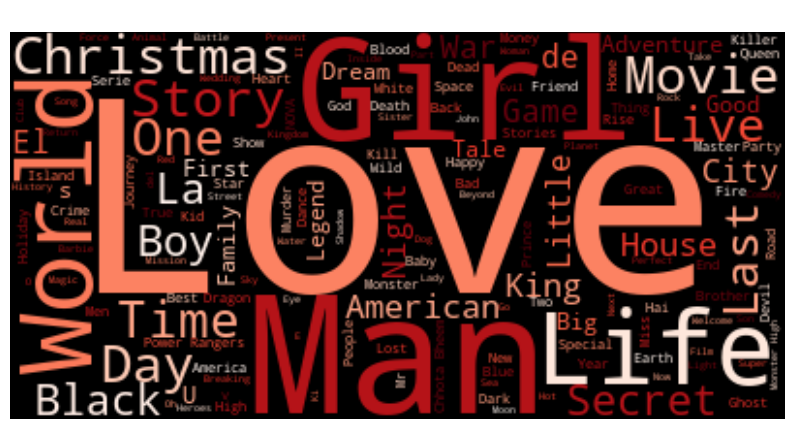

In [14]:
titles = netflix_data['title'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Titles', color='white')
plt.show()

### Word cloud for movie description

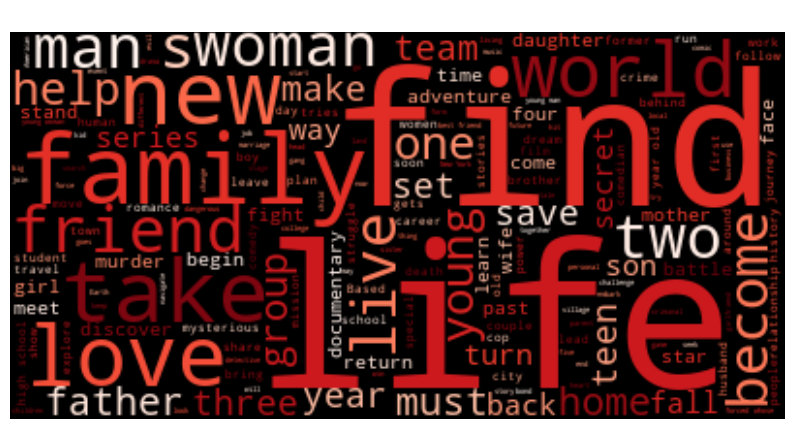

In [15]:
titles = netflix_data['description'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

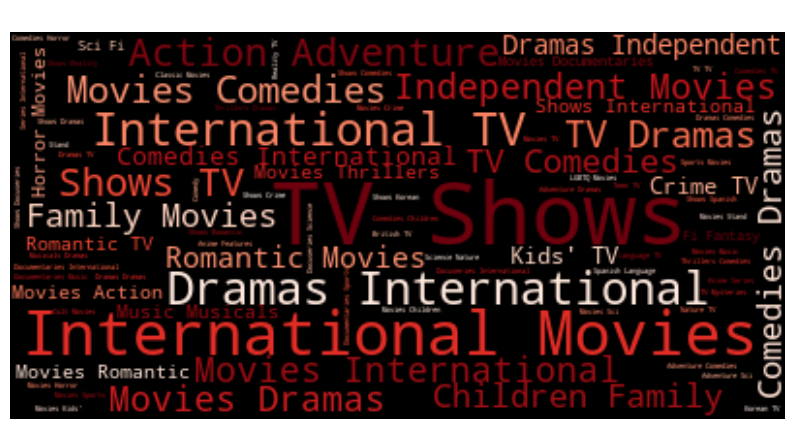

In [16]:
titles = netflix_data['listed_in'].values

text = ' '.join(titles)

wordcloud = WordCloud(background_color='black', colormap='Reds').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Descriptions', color='white')
plt.show()

## sample view of netflix data

In [17]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,,,,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [18]:
new_data = netflix_data[['title', 'type', 'director', 'cast', 'rating', 'listed_in', 'description']]
new_data.set_index('title', inplace=True)

In [19]:
new_data.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,TV Show,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,TV Show,,,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,TV Show,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning using NLP

In [20]:
class TextCleaner:
    def separate_text(self, texts):
        unique_texts = set()
        for text in texts.split(','):
            unique_texts.add(text.strip().lower())
        return ' '.join(unique_texts)

    def remove_space(self, texts):
        return texts.replace(' ', '').lower()

    def remove_punc(self, texts):
        texts = texts.lower()
        texts = texts.translate(str.maketrans('', '', string.punctuation))
        return ' '.join(texts.split())

    def clean_text(self, texts):
        texts = self.separate_text(texts)
        texts = self.remove_space(texts)
        texts = self.remove_punc(texts)
        return texts

In [21]:
cleaner = TextCleaner()

In [22]:
new_data['type']        = new_data['type'].apply(cleaner.remove_space)
new_data['director']    = new_data['director'].apply(cleaner.separate_text)
new_data['cast']        = new_data['cast'].apply(cleaner.separate_text)
new_data['rating']      = new_data['rating'].apply(cleaner.remove_space)
new_data['listed_in']   = new_data['listed_in'].apply(cleaner.separate_text)
new_data['description'] = new_data['description'].apply(cleaner.remove_punc)

## Cleaned Text

In [23]:
new_data.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,movie,kirsten johnson,,pg-13,documentaries,as her father nears the end of his life filmma...
Blood & Water,tvshow,,thabang molaba sello maake ka-ncube xolile tsh...,tv-ma,tv dramas international tv shows tv mysteries,after crossing paths at a party a cape town te...
Ganglands,tvshow,julien leclercq,salim kechiouche sami bouajila samuel jouy bak...,tv-ma,crime tv shows international tv shows tv actio...,to protect his family from a powerful drug lor...
Jailbirds New Orleans,tvshow,,,tv-ma,reality tv docuseries,feuds flirtations and toilet talk go down amon...
Kota Factory,tvshow,,jitendra kumar ahsaas channa mayur more arun k...,tv-ma,international tv shows romantic tv shows tv co...,in a city of coaching centers known to train i...


In [24]:
new_data['BoW'] = new_data.apply(lambda row: ' '.join(row.dropna().values), axis=1)
new_data.drop(new_data.columns[:-1], axis=1, inplace=True)

In [25]:
new_data.head()

,BoW
title,
Dick Johnson Is Dead,movie kirsten johnson pg-13 documentaries as ...
Blood & Water,tvshow thabang molaba sello maake ka-ncube xo...
Ganglands,tvshow julien leclercq salim kechiouche sami b...
Jailbirds New Orleans,tvshow tv-ma reality tv docuseries feuds fli...
Kota Factory,tvshow jitendra kumar ahsaas channa mayur mor...


In [26]:
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_data['BoW'])

In [27]:
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.        , 0.00504833, 0.02011193, ..., 0.01065369, 0.02109898,
        0.03048859],
       [0.00504833, 1.        , 0.01714561, ..., 0.00103121, 0.        ,
        0.00481712],
       [0.02011193, 0.01714561, 1.        , ..., 0.00560911, 0.01042642,
        0.0333502 ],
       ...,
       [0.01065369, 0.00103121, 0.00560911, ..., 1.        , 0.05649084,
        0.00600011],
       [0.02109898, 0.        , 0.01042642, ..., 0.05649084, 1.        ,
        0.01046521],
       [0.03048859, 0.00481712, 0.0333502 , ..., 0.00600011, 0.01046521,
        1.        ]])

In [28]:
cosine_sim

array([[1.        , 0.00504833, 0.02011193, ..., 0.01065369, 0.02109898,
        0.03048859],
       [0.00504833, 1.        , 0.01714561, ..., 0.00103121, 0.        ,
        0.00481712],
       [0.02011193, 0.01714561, 1.        , ..., 0.00560911, 0.01042642,
        0.0333502 ],
       ...,
       [0.01065369, 0.00103121, 0.00560911, ..., 1.        , 0.05649084,
        0.00600011],
       [0.02109898, 0.        , 0.01042642, ..., 0.05649084, 1.        ,
        0.01046521],
       [0.03048859, 0.00481712, 0.0333502 , ..., 0.00600011, 0.01046521,
        1.        ]])

In [29]:
np.save('tfidf_matrix.npy', tfid_matrix)
np.save('cosine_sim_matrix.npy', cosine_sim)

In [30]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfid, f)

In [31]:
final_data = netflix_data[['title', 'type']]

In [32]:
final_data.head()

,title,type
0,Dick Johnson Is Dead,Movie
1,Blood & Water,TV Show
2,Ganglands,TV Show
3,Jailbirds New Orleans,TV Show
4,Kota Factory,TV Show


In [33]:
final_data.to_csv('movie_data.csv',index=False)

## Custom Model Class Flixhub

In [ ]:
import re
import numpy as np
import pandas as pd
from typing import List, Tuple, Dict, Optional, Union
from datetime import datetime
from collections import defaultdict
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

class FlixHub1:
    """
    An enhanced content recommendation system for movies and TV shows.
    
    Features:
    - Content-based filtering using cosine similarity
    - Genre-based filtering
    - Release year filtering
    - Rating-based recommendations
    - Popularity-based recommendations
    - Multi-criteria search
    - Watch history tracking
    - Personalized recommendations
    """
    
    def __init__(self, df: pd.DataFrame, cosine_sim: np.ndarray, n_clusters: int = 10):
        """
        Initialize FlixHub with content data and similarity matrix.
        
        Args:
            df: DataFrame containing content metadata
            cosine_sim: Pre-computed cosine similarity matrix
            n_clusters: Number of clusters for content grouping
        """
        self.df = df
        self.cosine_sim = cosine_sim
        self.watch_history = defaultdict(list)
        self.user_ratings = defaultdict(dict)
        self.n_clusters = n_clusters
        self.content_embeddings = None
        self.cluster_labels = None
        self.pca_components = None
        self._validate_data()
        self._initialize_ml_components()
        
    def _validate_data(self) -> None:
        """Validate input data and prepare necessary columns."""
        required_columns = {'title', 'type', 'release_year', 'rating', 'duration',
                          'listed_in', 'description', 'director', 'cast'}
        missing_columns = required_columns - set(self.df.columns)
        if missing_columns:
            raise ValueError(f"Missing required columns: {missing_columns}")
            
        # Add popularity score based on various metrics
        self.df['popularity_score'] = self._calculate_popularity_score()
        
        # Prepare numerical features for clustering
        self._prepare_numerical_features()
        
    def _prepare_numerical_features(self) -> None:
        """Prepare numerical features for clustering algorithms."""
        # Convert categorical features to numerical
        self.df['type_encoded'] = pd.factorize(self.df['type'])[0]
        self.df['rating_encoded'] = pd.factorize(self.df['rating'])[0]
        
        # Extract numerical features from duration
        self.df['duration_value'] = self.df['duration'].str.extract('(\d+)').astype(float)
        
        # Create genre dummy variables
        genre_dummies = self.df['listed_in'].str.get_dummies(sep=',')
        self.df = pd.concat([self.df, genre_dummies], axis=1)
        
    def _initialize_ml_components(self) -> None:
        """Initialize and train unsupervised learning models."""
        # Prepare feature matrix for clustering
        numerical_features = ['release_year', 'type_encoded', 'rating_encoded', 
                            'duration_value', 'popularity_score']
        
        # Add genre columns
        genre_columns = [col for col in self.df.columns if col.startswith('listed_in_')]
        features = numerical_features + genre_columns
        
        # Scale features
        scaler = StandardScaler()
        X = scaler.fit_transform(self.df[features])
        
        # Dimensionality reduction with PCA
        pca = PCA(n_components=min(X.shape[1], 50))
        self.pca_components = pca.fit_transform(X)
        
        # Content clustering using multiple algorithms
        self._perform_clustering(self.pca_components)
        
        # Create content embeddings using NMF
        self._create_content_embeddings()
        
    def _calculate_popularity_score(self) -> pd.Series:
        """Calculate content popularity score based on multiple factors."""
        current_year = datetime.now().year
        
        # Age factor: newer content gets higher score
        age_score = (self.df['release_year'] - self.df['release_year'].min()) / \
                   (current_year - self.df['release_year'].min())
                   
        # Rating factor: convert ratings to numerical scores
        rating_map = {
            'TV-Y': 1, 'TV-Y7': 2, 'TV-G': 3, 'TV-PG': 4,
            'TV-14': 5, 'TV-MA': 6, 'G': 3, 'PG': 4, 'PG-13': 5,
            'R': 6, 'NC-17': 7
        }
        rating_score = self.df['rating'].map(rating_map).fillna(0) / 7
        
        # Combine factors with weights
        return (0.4 * age_score + 
                0.3 * rating_score + 
                0.3 * np.random.uniform(0, 1, len(self.df)))  # Randomness factor
    
    def recommendation(self, 
                      title: str, 
                      total_result: int = 5,
                      threshold: float = 0.5,
                      content_type: Optional[str] = None,
                      min_year: Optional[int] = None,
                      max_year: Optional[int] = None,
                      genres: Optional[List[str]] = None,
                      include_popular: bool = False) -> Dict[str, List[Dict]]:
        """
        Get advanced content recommendations based on multiple criteria.
        
        Args:
            title: Content title to base recommendations on
            total_result: Number of recommendations to return
            threshold: Minimum similarity score threshold
            content_type: Filter by content type ('Movie' or 'TV Show')
            min_year: Minimum release year
            max_year: Maximum release year
            genres: List of genres to filter by
            include_popular: Whether to include popularity in ranking
            
        Returns:
            Dictionary containing filtered and ranked recommendations
        """
        idx = self._find_id(title)
        if idx == -1:
            raise ValueError(f"Content titled '{title}' not found")
            
        # Calculate similarity scores
        self.df['similarity'] = self.cosine_sim[idx]
        
        # Apply filters
        filtered_df = self._apply_filters(
            self.df.copy(),
            content_type,
            min_year,
            max_year,
            genres,
            threshold
        )
        
        # Sort and rank results
        if include_popular:
            filtered_df['final_score'] = (
                0.7 * filtered_df['similarity'] +
                0.3 * filtered_df['popularity_score']
            )
            sort_column = 'final_score'
        else:
            sort_column = 'similarity'
            
        recommendations = self._prepare_recommendations(
            filtered_df,
            sort_column,
            total_result
        )
        
        return recommendations
    
    def _apply_filters(self,
                      df: pd.DataFrame,
                      content_type: Optional[str],
                      min_year: Optional[int],
                      max_year: Optional[int],
                      genres: Optional[List[str]],
                      threshold: float) -> pd.DataFrame:
        """Apply all specified filters to the DataFrame."""
        # Remove the reference content
        df = df[df['similarity'] < 1.0]
        
        # Apply similarity threshold
        df = df[df['similarity'] >= threshold]
        
        # Apply content type filter
        if content_type:
            df = df[df['type'] == content_type]
            
        # Apply year range filter
        if min_year:
            df = df[df['release_year'] >= min_year]
        if max_year:
            df = df[df['release_year'] <= max_year]
            
        # Apply genre filter
        if genres:
            genre_mask = df['listed_in'].apply(
                lambda x: any(genre.lower() in x.lower() for genre in genres)
            )
            df = df[genre_mask]
            
        return df
    
    def _prepare_recommendations(self,
                               df: pd.DataFrame,
                               sort_column: str,
                               total_result: int) -> Dict[str, List[Dict]]:
        """Prepare and format recommendations."""
        result = {
            'Movies': [],
            'TV Shows': []
        }
        
        # Sort and split by content type
        sorted_df = df.sort_values(by=sort_column, ascending=False)
        
        for content_type in ['Movie', 'TV Show']:
            type_df = sorted_df[sorted_df['type'] == content_type].head(total_result)
            
            for _, row in type_df.iterrows():
                content_info = {
                    'title': row['title'],
                    'year': row['release_year'],
                    'rating': row['rating'],
                    'similarity': f"{row['similarity']:.2f}",
                    'genres': row['listed_in'],
                    'duration': row['duration']
                }
                
                if content_type == 'Movie':
                    result['Movies'].append(content_info)
                else:
                    result['TV Shows'].append(content_info)
                    
        return result
    
    def _find_id(self, name: str) -> int:
        """Find content ID using regex pattern matching."""
        pattern = re.compile(name, re.IGNORECASE)
        for index, string in enumerate(self.df['title']):
            if pattern.search(string):
                return index
        return -1
    
    def add_to_watch_history(self, user_id: str, content_title: str) -> None:
        """Add content to user's watch history."""
        if content_title in self.df['title'].values:
            self.watch_history[user_id].append({
                'title': content_title,
                'timestamp': datetime.now()
            })
    
    def rate_content(self, 
                    user_id: str, 
                    content_title: str, 
                    rating: float) -> None:
        """Allow users to rate content."""
        if not (0 <= rating <= 5):
            raise ValueError("Rating must be between 0 and 5")
            
        if content_title in self.df['title'].values:
            self.user_ratings[user_id][content_title] = rating
    
    def get_personalized_recommendations(self,
                                       user_id: str,
                                       total_result: int = 5) -> Dict[str, List[Dict]]:
        """Generate personalized recommendations based on watch history and ratings."""
        if user_id not in self.watch_history:
            raise ValueError(f"No watch history found for user {user_id}")
            
        # Calculate weighted average of similarity scores based on watch history
        watched_titles = [item['title'] for item in self.watch_history[user_id]]
        
        combined_similarity = np.zeros_like(self.cosine_sim[0])
        for title in watched_titles:
            idx = self._find_id(title)
            if idx != -1:
                weight = 1.0
                if title in self.user_ratings[user_id]:
                    weight = self.user_ratings[user_id][title] / 5.0
                combined_similarity += weight * self.cosine_sim[idx]
                
        combined_similarity /= len(watched_titles)
        
        # Use combined similarity for recommendations
        self.df['similarity'] = combined_similarity
        return self.recommendation(
            watched_titles[-1],  # Use last watched title as reference
            total_result=total_result,
            include_popular=True
        )

    def _perform_clustering(self, X: np.ndarray) -> None:
        """
        Perform content clustering using multiple algorithms and ensemble methods.
        
        Args:
            X: Feature matrix for clustering
        """
        # K-means clustering
        kmeans = KMeans(n_clusters=self.n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(X)
        
        # DBSCAN clustering
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        dbscan_labels = dbscan.fit_predict(X)
        
        # Hierarchical clustering
        hierarchical = AgglomerativeClustering(n_clusters=self.n_clusters)
        hierarchical_labels = hierarchical.fit_predict(X)
        
        # Gaussian Mixture Model
        gmm = GaussianMixture(n_components=self.n_clusters, random_state=42)
        gmm_labels = gmm.fit_predict(X)
        
        # Ensemble clustering: combine results using voting
        all_labels = np.column_stack([kmeans_labels, dbscan_labels, 
                                    hierarchical_labels, gmm_labels])
        self.cluster_labels = np.apply_along_axis(
            lambda x: np.bincount(x[x >= 0]).argmax(), 
            axis=1, 
            arr=all_labels
        )
        
        # Store cluster metrics
        self.cluster_metrics = {
            'kmeans_silhouette': silhouette_score(X, kmeans_labels),
            'hierarchical_silhouette': silhouette_score(X, hierarchical_labels),
            'gmm_silhouette': silhouette_score(X, gmm_labels)
        }
        
        # Add cluster assignments to DataFrame
        self.df['cluster'] = self.cluster_labels
        
    def _create_content_embeddings(self, n_components: int = 50) -> None:
        """
        Create content embeddings using Non-negative Matrix Factorization.
        
        Args:
            n_components: Number of components for NMF
        """
        # Prepare feature matrix
        numerical_features = ['release_year', 'type_encoded', 'rating_encoded', 
                            'duration_value', 'popularity_score']
        genre_columns = [col for col in self.df.columns if col.startswith('listed_in_')]
        features = numerical_features + genre_columns
        
        # Scale features
        scaler = MinMaxScaler()
        X = scaler.fit_transform(self.df[features])
        
        # Apply NMF
        nmf = NMF(n_components=n_components, random_state=42)
        self.content_embeddings = nmf.fit_transform(X)
        
    def get_similar_content_by_clusters(self, 
                                      title: str, 
                                      n_recommendations: int = 5) -> List[Dict]:
        """
        Get content recommendations based on cluster assignments.
        
        Args:
            title: Reference content title
            n_recommendations: Number of recommendations to return
            
        Returns:
            List of similar content based on cluster membership
        """
        idx = self._find_id(title)
        if idx == -1:
            raise ValueError(f"Content titled '{title}' not found")
            
        cluster = self.cluster_labels[idx]
        
        # Get content from the same cluster
        cluster_content = self.df[self.df['cluster'] == cluster]
        
        # Calculate similarity within cluster using content embeddings
        cluster_similarities = np.dot(
            self.content_embeddings[cluster_content.index],
            self.content_embeddings[idx]
        )
        
        # Sort by similarity and return top recommendations
        cluster_content['cluster_similarity'] = cluster_similarities
        recommendations = cluster_content.nlargest(
            n_recommendations + 1, 'cluster_similarity'
        )
        
        # Remove the reference content
        recommendations = recommendations[
            recommendations.index != idx
        ].head(n_recommendations)
        
        return recommendations[['title', 'type', 'cluster_similarity']].to_dict('records')
    
    def analyze_content_distribution(self) -> Dict[str, Dict]:
        """
        Analyze content distribution across clusters.
        
        Returns:
            Dictionary containing cluster statistics and insights
        """
        analysis = {}
        
        # Cluster size distribution
        cluster_sizes = pd.Series(self.cluster_labels).value_counts()
        analysis['cluster_sizes'] = cluster_sizes.to_dict()
        
        # Content type distribution per cluster
        type_distribution = self.df.groupby(['cluster', 'type']).size().unstack()
        analysis['type_distribution'] = type_distribution.to_dict()
        
        # Average popularity per cluster
        popularity_stats = self.df.groupby('cluster')['popularity_score'].agg(
            ['mean', 'std']
        )
        analysis['popularity_stats'] = popularity_stats.to_dict()
        
        # Genre distribution per cluster
        genre_columns = [col for col in self.df.columns if col.startswith('listed_in_')]
        genre_dist = self.df.groupby('cluster')[genre_columns].mean()
        analysis['genre_distribution'] = genre_dist.to_dict()
        
        # Cluster quality metrics
        analysis['cluster_metrics'] = self.cluster_metrics
        
        return analysis

    def search_content(self,
                      query: str,
                      search_fields: List[str] = ['title', 'description', 'cast', 'director'],
                      fuzzy_match: bool = True) -> pd.DataFrame:
        """
        Search for content across multiple fields with optional fuzzy matching.
        
        Args:
            query: Search query string
            search_fields: List of fields to search in
            fuzzy_match: Whether to use fuzzy matching
            
        Returns:
            DataFrame containing search results
        """
        pattern = re.compile(query, re.IGNORECASE)
        


In [34]:
import re
class FlixHub:
    def __init__(self, df, cosine_sim):
        self.df = df
        self.cosine_sim = cosine_sim
    
    def recommendation(self, title, total_result=5, threshold=0.5):
        idx = self.find_id(title)
        self.df['similarity'] = self.cosine_sim[idx]
        sort_df = self.df.sort_values(by='similarity', ascending=False)[1:total_result+1]
        
        movies = sort_df['title'][sort_df['type'] == 'Movie']
        tv_shows = sort_df['title'][sort_df['type'] == 'TV Show']
        
        similar_movies = []
        similar_tv_shows = []
        
        for i, movie in enumerate(movies):
            similar_movies.append('{}. {}'.format(i+1, movie))
        
        for i, tv_show in enumerate(tv_shows):
            similar_tv_shows.append('{}. {}'.format(i+1, tv_show))
        
        return similar_movies, similar_tv_shows

    def find_id(self, name):
        for index, string in enumerate(self.df['title']):
            if re.search(name, string):
                return index
        return -1

In [46]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('AlphaGo', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. Elizabeth and Margaret: Love and Loyalty
2. Manu
3. 2036 Origin Unknown
4. Pelé
5. S Is for Stanley
6. The Edge of Democracy
7. Singularity

Similar TV_show(s) list:
1. The Last of the Schmucks
2. Fastest Car
3. Droppin' Cash: Los Angeles


In [37]:
flix_hub = FlixHub(final_data, cosine_sim)
movies, tv_shows = flix_hub.recommendation('Singularity', total_result=10, threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
    print(movie)

print('\nSimilar TV_show(s) list:')
for tv_show in tv_shows:
    print(tv_show)

Similar Movie(s) list:
1. AlphaGo
2. 2036 Origin Unknown
3. Chappie
4. 2012
5. Left Behind
6. A Boy Called Po
7. Battlefield Earth
8. Expelled from Paradise
9. Iron Sky: The Coming Race

Similar TV_show(s) list:
1. Star Trek: Voyager
